A quick look at the data for the GOP candidate. When were the most emails sent? How many unique senders were there? What are the most common words across all the emails? How often are key topics mentioned? And ultimately, a graph of mentions of the 3 democrat frontrunners over time.

In [152]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [153]:
%matplotlib inline 

In [154]:
emf = pd.read_json('obj/topGOPCampaignEmailOutput.json')
emf.head()

,Body,Date,From,Subject
0,"++HYPERLINK++ recipientFirstName, If there's ...",2019-05-25 15:05:25,"""Eric Trump"" <contact@victory.donaldtrump.com>",=?UTF-8?B?Tiwgd2XigJl2ZSBnb3QgeW91ciBtZW1iZXJz...
1,++HYPERLINK++ JOIN PRESIDENT TRUMP IN PANAMA ...,2019-05-06 14:04:15,"""Team Trump-Pence"" <contact@team.donaldtrump.com>",Join the president in TWO days
2,"++HYPERLINK++ recipientFirstName, The ONE MIL...",2019-06-03 18:31:41,"""Lara Trump"" <contact@victory.donaldtrump.com>",=?UTF-8?B?SXTigJlzIHJlYWR5IHRvIGdv?=
3,Take a stand against the left-wing mob. | rec...,2019-03-20 21:00:02,"""DonaldJTrump.com"" <contact@victory.donaldtrum...",Stand with President Trump
4,"++HYPERLINK++ recipientFirstName, The Preside...",2019-01-31 20:06:35,"""Lara Trump"" <contact@victory.donaldtrump.com>",Start 2019 strong


Let's see what the first and last date of the emails are

In [155]:
maxmin = emf['Date'].agg(['max','min'])
print(maxmin[:2])
d2, d1 = maxmin[0],maxmin[1]
ddiff = d2 - d1
print('Total span of {} days'.format(ddiff.days))
print('Total number of emails: {}, average of {} per day'.format(emf['Date'].count(), int(emf['Date'].count()) / int(ddiff.days)))

max   2020-01-06 22:04:59
min   2017-11-03 18:00:01
Name: Date, dtype: datetime64[ns]
Total span of 794 days
Total number of emails: 500, average of 0.6297229219143576 per day


In [156]:
plt.rcParams["figure.figsize"] = [10,6]

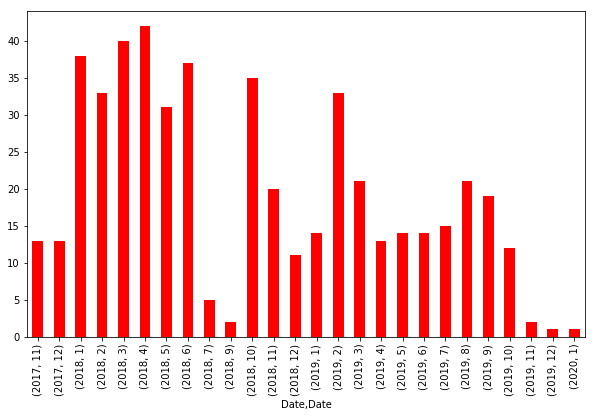

In [172]:
emf.groupby([emf["Date"].dt.year, emf["Date"].dt.month])['Subject'].agg('count').plot(kind="bar", color='red')


There were no emails sent in August, 2018... I went back to my email, and sure enough. I wonder why. Might be worth looking at the news cycle for that month.

Let's start with the NLTK. 

In [158]:
allBody = emf['Body'].str.cat(sep=' ')
allBody

 All you have to do is contribute $5 or more and you\'ll be automatically entered to win dinner with me in New Orleans. My team will even cover your flight and hotel room. ++HYPERLINK++ Please contribute $5 before May 9th at 11:59 PM to be automatically entered to have dinner with me in New Orleans. ++HYPERLINK++ ++HYPERLINK++ NEW ORLEANS DINNER SWEEPSTAKES ENTRY SUPPORTER: ++HYPERLINK++ recipientEmail ENTRY: PENDING DEADLINE: MAY 9th at 11:59 PM ++HYPERLINK++ CONTRIBUTE $5 ++HYPERLINK++ CONTRIBUTE $20 ++HYPERLINK++ CONTRIBUTE $15 ++HYPERLINK++ CONTRIBUTE $10 ++HYPERLINK++ CONTRIBUTE $5 ++HYPERLINK++ CONTRIBUTE OTHER AMOUNT Don\'t let this once-in-a-lifetime opportunity pass you by. You\'ll receive dinner and a photo with me, and we will cover the cost of your flight and hotel room. All you have to do is show up. I hope to see you there! ++HYPERLINK++ Contribute $5 before May 9th at 11:59 PM to be automatically entered to win dinner with me in New Orleans. Thank you, ++HYPERLINK++ Dona

In [159]:
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
from nltk import FreqDist

In [160]:
words = word_tokenize(allBody.lower())
sentences = sent_tokenize(allBody)
print('number of tokens (words and punctiation): {}; number of sentences: {}; number of unique tokens: {}'.format(len(words),len(sentences),len(set(words))))
print('lexical diversity: {}%'.format(100*(len(set(allBody)) / len(allBody))))

number of tokens (words and punctiation): 129804; number of sentences: 5307; number of unique tokens: 3845
lexical diversity: 0.012417942798439855%


In [161]:
stop_words = set(stopwords.words('english'))
ft = [w for w in words if not w in stop_words]
ft = [w for w in ft if w.isalpha()]
trump_stop_words = ['++hyperlink++','contribute','trump','i','president','pm','11:59','tonight','donald','the','j.','other','you','american','amount','official','headquarters','sustaining']
ft = [w for w in ft if not w in trump_stop_words]


In [162]:
commWords = FreqDist(ft).most_common(50)
commWords

[('please', 666),
 ('recipientfirstname', 618),
 ('make', 546),
 ('america', 515),
 ('contribution', 465),
 ('thank', 415),
 ('name', 373),
 ('take', 360),
 ('democrats', 357),
 ('deadline', 356),
 ('states', 345),
 ('win', 338),
 ('united', 338),
 ('recipientemail', 332),
 ('first', 326),
 ('membership', 318),
 ('great', 304),
 ('list', 298),
 ('want', 297),
 ('media', 289),
 ('team', 278),
 ('one', 277),
 ('get', 271),
 ('need', 265),
 ('wall', 254),
 ('us', 238),
 ('country', 232),
 ('survey', 227),
 ('people', 225),
 ('sign', 223),
 ('time', 221),
 ('help', 208),
 ('friend', 193),
 ('know', 188),
 ('let', 187),
 ('card', 185),
 ('movement', 183),
 ('dinner', 182),
 ('entered', 176),
 ('email', 170),
 ('supporters', 170),
 ('number', 169),
 ('never', 167),
 ('news', 164),
 ('year', 161),
 ('see', 158),
 ('renew', 157),
 ('show', 156),
 ('enter', 156),
 ('day', 155)]

In [163]:
print(emf['From'].unique())
print()
print('in total, {} distinct senders'.format(len(emf['From'].unique())))

['"Eric Trump" <contact@victory.donaldtrump.com>'
 '"Team Trump-Pence" <contact@team.donaldtrump.com>'
 '"Lara Trump" <contact@victory.donaldtrump.com>'
 '"DonaldJTrump.com" <contact@victory.donaldtrump.com>'
 '"Donald J. Trump" <contact@victory.donaldtrump.com>'
 '"Trump Headquarters" <contact@campaigns.rnchq.com>'
 '"Karen Pence" <contact@victory.donaldtrump.com>'
 '"Trump Headquarters" <info@team.gop.com>'
 '"Donald J. Trump" <contact@campaigns.rnchq.com>'
 '"Mike Pence" <contact@victory.donaldtrump.com>'
 '"Brad Parscale" <contact@victory.donaldtrump.com>'
 '"Donald J. Trump" <contact@action.gop.com>'
 '"Trump Double Entry" <contact@victory.donaldtrump.com>'
 '"Newt Gingrich" <contact@campaigns.rnchq.com>'
 '"4X-MATCHING@TrumpHeadquarters" <contact@campaigns.rnchq.com>'
 '"Donald Trump Jr." <contact@victory.donaldtrump.com>'
 '"Official Trump Polling" <contact@victory.donaldtrump.com>'
 '"Trump Finance" <contact@victory.donaldtrump.com>'
 '"Trump Dinner Alert" <contact@victory.dona

Now let's look at mentions of key phrases. We've grouped by year, month and now, for each year, month we'll count the number of occurrences of each key word. Some come from the most common words listed above, others are political candidates and political talking points.

In [164]:
emf['democrat'] = [str(bodyText).lower().count('democrat') for bodyText in emf['Body']]
emf['fake_news'] = [str(bodyText).lower().count('fake news') for bodyText in emf['Body']]
emf['witch'] = [str(bodyText).lower().count('witch') for bodyText in emf['Body']]
emf['socialist'] = [str(bodyText).lower().count('socialist') for bodyText in emf['Body']]
emf['biden'] = [(str(bodyText).lower().count('sleepy joe') + str(bodyText).lower().count('biden')) for bodyText in emf['Body']]
emf['bernie'] = [str(bodyText).lower().count('bernie') for bodyText in emf['Body']]
emf['warren'] = [(str(bodyText).lower().count('pocahon') + str(bodyText).lower().count('warren')) for bodyText in emf['Body']]
emf['mueller'] = [str(bodyText).lower().count('mueller') for bodyText in emf['Body']]
emf['media'] = [str(bodyText).lower().count('media') for bodyText in emf['Body']]
bym = emf.groupby([emf["Date"].dt.year, emf["Date"].dt.month])

In [165]:
terms = bym.agg({'democrat' : ['sum'], 'fake_news' : ['sum'], 
'witch' : ['sum'], 'socialist' : ['sum'], 'mueller' : ['sum'], 'media' : ['sum'], 
'biden' : ['sum'], 'bernie' : ['sum'], 'warren' : ['sum']})
terms.columns = [x[0] for x in terms.columns.ravel()]
terms

democrat  fake_news  witch  socialist  mueller  media  biden  \
Date Date                                                                 
2017 11           3          0      0          0        0     19      0   
     12           0          2      0          0        0      5      0   
2018 1           28         24      3          0        0     44      0   
     2            4         10      3          0        0     29      0   
     3           28         15      6          0        0     38      0   
     4            6         12      7          0        0     12      0   
     5            7          0      6          0        4     10      0   
     6            8          3      0          0        0      9      0   
     7            4          0      0          0        0      0      0   
     9            4          0      5          0        0      0      0   
     10          55          4      5          0        0     26      0   
     11          17          2      0          6        0     20      0   
     12          19          0      0          0        0      3      0   
2019 1           31          3      0          0        0      6      0   
     2           57          0      5          7        0     23      0   
     3           34         11      7          2        1     22      0   
     4           17          5      8          3        3     12      0   
     5            9          9      7          0        3      8      0   
     6            5          5      0          2        0      5      1   
     7           14         10      5         10        3      9      4   
     8           28         12      1         15        0     20      4   
     9           20          3      1          8        0      6      0   
     10          12          8      7          2        0      8      4   
     11           6          1      3          0        0      2      0   
     12           2          0      0          0        0      0      0   
2020 1            2          0      0          0        0      0      0   

           bernie  warren  
Date Date                  
2017 11         0       0  
     12         0       0  
2018 1          0       0  
     2          0       0  
     3          0       1  
     4          0       0  
     5          0       0  
     6          0       0  
     7          0       0  
     9          0       0  
     10         0       1  
     11         0       0  
     12         0       0  
2019 1          0       0  
     2          4       0  
     3          0       0  
     4          0       0  
     5          0       0  
     6          1       0  
     7          4       3  
     8          4       2  
     9          0       0  
     10         0       0  
     11         0       0  
     12         0       0  
2020 1          0       0

Plotting the occurance of each selected word above, without normalizing for number of emails sent
(This will be a count of the total number of mentions per month): 

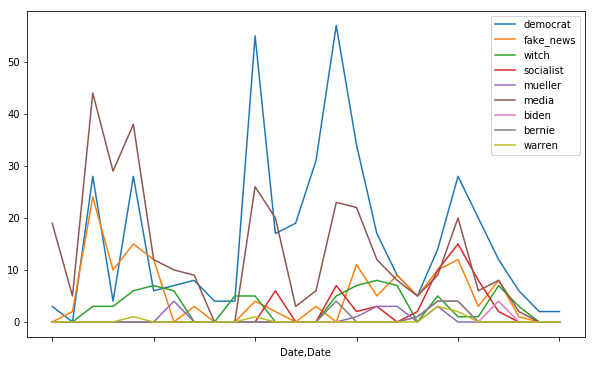

In [166]:
terms.plot(kind='line')

In order to normalize we'll create a dataframe of month,year,count of emails.

In [173]:
emailCount = bym[['From']].agg('count')
terms['email_count'] = emailCount['From']
terms

democrat  fake_news  witch  socialist  mueller  media  biden  \
Date Date                                                                 
2017 11           3          0      0          0        0     19      0   
     12           0          2      0          0        0      5      0   
2018 1           28         24      3          0        0     44      0   
     2            4         10      3          0        0     29      0   
     3           28         15      6          0        0     38      0   
     4            6         12      7          0        0     12      0   
     5            7          0      6          0        4     10      0   
     6            8          3      0          0        0      9      0   
     7            4          0      0          0        0      0      0   
     9            4          0      5          0        0      0      0   
     10          55          4      5          0        0     26      0   
     11          17          2      0          6        0     20      0   
     12          19          0      0          0        0      3      0   
2019 1           31          3      0          0        0      6      0   
     2           57          0      5          7        0     23      0   
     3           34         11      7          2        1     22      0   
     4           17          5      8          3        3     12      0   
     5            9          9      7          0        3      8      0   
     6            5          5      0          2        0      5      1   
     7           14         10      5         10        3      9      4   
     8           28         12      1         15        0     20      4   
     9           20          3      1          8        0      6      0   
     10          12          8      7          2        0      8      4   
     11           6          1      3          0        0      2      0   
     12           2          0      0          0        0      0      0   
2020 1            2          0      0          0        0      0      0   

           bernie  warren  email_count  
Date Date                               
2017 11         0       0           13  
     12         0       0           13  
2018 1          0       0           38  
     2          0       0           33  
     3          0       1           40  
     4          0       0           42  
     5          0       0           31  
     6          0       0           37  
     7          0       0            5  
     9          0       0            2  
     10         0       1           35  
     11         0       0           20  
     12         0       0           11  
2019 1          0       0           14  
     2          4       0           33  
     3          0       0           21  
     4          0       0           13  
     5          0       0           14  
     6          1       0           14  
     7          4       3           15  
     8          4       2           21  
     9          0       0           19  
     10         0       0           12  
     11         0       0            2  
     12         0       0            1  
2020 1          0       0            1

In [168]:
normalized = terms[['democrat','fake_news','witch','socialist','mueller','media','biden','bernie','warren']].div(terms['email_count'], axis=0)

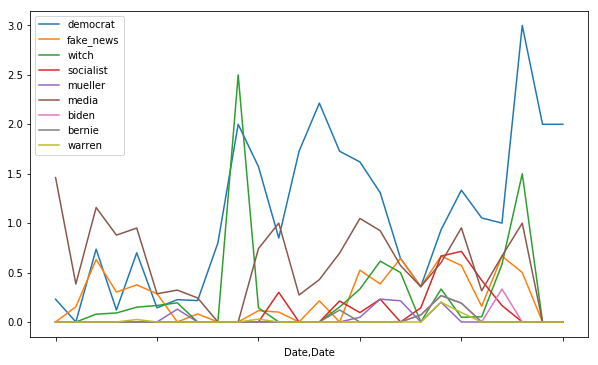

In [169]:
normalized.plot(kind='line')

specifically looking at the three frontrunners whose emails are in the sample .mbox, normalized by number of emails sent per month.

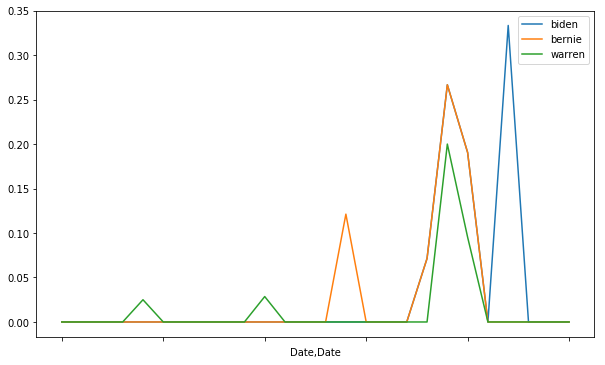

In [170]:
normalized[['biden','bernie','warren']].plot(kind='line')

The Y axis shows mentions per email sent, and the X is the year and month. No mentions of Bernie or Warren after August, 2019. The spike in Biden's attention is from 4 mentions in October, 2019. Spitballing, maybe there's a spike in mentions of all three because the Democrats have started to consolidate behind the three frontrunners before the primary. Leading up to then rhetoric was nameless Democrats and Socialists at large (with two mentions of THE SQUAD earlier in 2019).